## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

df0 = pd.DataFrame(mouse_metadata)
df1 = pd.DataFrame(study_results)

print('mouse metadata')
df0.info()

print('-------------------')

print('study results')
df1.info()


mouse metadata
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
-------------------
study results
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [2]:
# Combine the data into a single dataset
df_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID')


# Display the data table for preview
df_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
m_list = df_merge['Mouse ID'].unique()
m_count = len(m_list)
print(m_count)


249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_combined = df_merge

df_duplicated = df_combined[df_combined.duplicated(subset=['Mouse ID', 'Timepoint'])]

df_duplicated



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_dedupe = df_combined.drop_duplicates(subset=['Mouse ID'])







In [7]:
# Checking the number of mice in the clean DataFrame.
df_dedupe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [8]:
df_dedupe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 1883
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            249 non-null    object 
 1   Drug Regimen        249 non-null    object 
 2   Sex                 249 non-null    object 
 3   Age_months          249 non-null    int64  
 4   Weight (g)          249 non-null    int64  
 5   Timepoint           249 non-null    int64  
 6   Tumor Volume (mm3)  249 non-null    float64
 7   Metastatic Sites    249 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.5+ KB


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

f = 'data/Study_results.csv'
d = pd.read_csv(f)
df = pd.DataFrame(d)
df['Tumor Volume (mm3)'].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



count    1893.000000
mean       50.448381
std         8.894722
min        22.050126
25%        45.000000
50%        48.951474
75%        56.292200
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

Text(0, 0.5, 'Frequency')

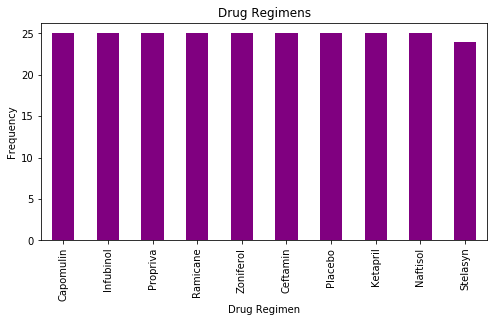

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
f = 'data/Mouse_metadata.csv'
d = pd.read_csv(f)
df = pd.DataFrame(d)
measurements = df['Drug Regimen'].value_counts().plot(
    kind='bar',
    title='Drug Regimens', 
    color='purple', 
    figsize=(8,4),
)

xlabel = 'Drug Regimen'
ylabel = 'Frequency'

measurements.set_xlabel(xlabel)
measurements.set_ylabel(ylabel)

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
